In [120]:
import matplotlib.pyplot as plt
import numpy as np
import json
import datetime

In [136]:
policy = 'RR'
with open(f'YACS/master/log_master_{policy}.log') as f:
    logs = f.readlines()

In [137]:
print(logs)

['2020-12-05 11:34:44,414 %MASTER RECEIVED JOB%{"job_id": "0", "map_tasks": [{"task_id": "0_M0", "duration": 3}, {"task_id": "0_M1", "duration": 4}], "reduce_tasks": [{"task_id": "0_R0", "duration": 1}]}\n', '2020-12-05 11:34:44,436 %SENDING WORKER WITH ID 1 and slots 4 the task%{"task_id": "0_M0", "duration": 3, "status": 1}\n', '2020-12-05 11:34:44,539 %SENDING WORKER WITH ID 1 and slots 3 the task%{"task_id": "0_M1", "duration": 4, "status": 1}\n', '2020-12-05 11:34:45,220 %MASTER RECEIVED JOB%{"job_id": "1", "map_tasks": [{"task_id": "1_M0", "duration": 3}], "reduce_tasks": [{"task_id": "1_R0", "duration": 2}, {"task_id": "1_R1", "duration": 2}]}\n', '2020-12-05 11:34:45,265 %SENDING WORKER WITH ID 1 and slots 2 the task%{"task_id": "1_M0", "duration": 3, "status": 1}\n', '2020-12-05 11:34:46,460 %MASTER RECEIVED JOB%{"job_id": "2", "map_tasks": [{"task_id": "2_M0", "duration": 4}, {"task_id": "2_M1", "duration": 2}, {"task_id": "2_M2", "duration": 2}, {"task_id": "2_M3", "duration

In [138]:
job_received_log = []
job_completed_log = []
for log in logs:
    log = log.split('%')
    log[0] = log[0].strip()
    if log[1] == 'MASTER RECEIVED JOB':
        job_received_log.append(log)
    elif log[1] == 'JOB FINISHED WITH ID:':
        job_completed_log.append(log)

In [139]:
job_received_log

[['2020-12-05 11:34:44,414',
  'MASTER RECEIVED JOB',
  '{"job_id": "0", "map_tasks": [{"task_id": "0_M0", "duration": 3}, {"task_id": "0_M1", "duration": 4}], "reduce_tasks": [{"task_id": "0_R0", "duration": 1}]}\n'],
 ['2020-12-05 11:34:45,220',
  'MASTER RECEIVED JOB',
  '{"job_id": "1", "map_tasks": [{"task_id": "1_M0", "duration": 3}], "reduce_tasks": [{"task_id": "1_R0", "duration": 2}, {"task_id": "1_R1", "duration": 2}]}\n'],
 ['2020-12-05 11:34:46,460',
  'MASTER RECEIVED JOB',
  '{"job_id": "2", "map_tasks": [{"task_id": "2_M0", "duration": 4}, {"task_id": "2_M1", "duration": 2}, {"task_id": "2_M2", "duration": 2}, {"task_id": "2_M3", "duration": 2}], "reduce_tasks": [{"task_id": "2_R0", "duration": 4}, {"task_id": "2_R1", "duration": 1}]}\n'],
 ['2020-12-05 11:34:46,815',
  'MASTER RECEIVED JOB',
  '{"job_id": "3", "map_tasks": [{"task_id": "3_M0", "duration": 1}], "reduce_tasks": [{"task_id": "3_R0", "duration": 3}]}\n'],
 ['2020-12-05 11:34:47,534',
  'MASTER RECEIVED JOB'

In [140]:
job_completed_log

[['2020-12-05 11:34:49,032',
  'JOB FINISHED WITH ID:',
  '1',
  ' and reduce tasks 2\n'],
 ['2020-12-05 11:34:49,613',
  'JOB FINISHED WITH ID:',
  '0',
  ' and reduce tasks 1\n'],
 ['2020-12-05 11:34:50,043',
  'JOB FINISHED WITH ID:',
  '3',
  ' and reduce tasks 1\n'],
 ['2020-12-05 11:34:53,663',
  'JOB FINISHED WITH ID:',
  '2',
  ' and reduce tasks 2\n'],
 ['2020-12-05 11:34:55,738',
  'JOB FINISHED WITH ID:',
  '4',
  ' and reduce tasks 2\n'],
 ['2020-12-05 11:34:56,197',
  'JOB FINISHED WITH ID:',
  '5',
  ' and reduce tasks 2\n'],
 ['2020-12-05 11:34:56,198',
  'JOB FINISHED WITH ID:',
  '8',
  ' and reduce tasks 1\n'],
 ['2020-12-05 11:34:58,174',
  'JOB FINISHED WITH ID:',
  '12',
  ' and reduce tasks 1\n'],
 ['2020-12-05 11:34:58,254',
  'JOB FINISHED WITH ID:',
  '7',
  ' and reduce tasks 2\n'],
 ['2020-12-05 11:34:58,260',
  'JOB FINISHED WITH ID:',
  '10',
  ' and reduce tasks 2\n'],
 ['2020-12-05 11:34:58,788',
  'JOB FINISHED WITH ID:',
  '9',
  ' and reduce tasks 2\n'

In [141]:
for i in job_received_log:
    i[2] = json.loads(i[2])['job_id']

In [142]:
def convert_to_datetime(datetime_string):
    k = datetime.datetime.strptime(datetime_string, '%Y-%m-%d %H:%M:%S,%f')
    return k

In [143]:
job_times = {}
for i in job_received_log:
    for j in job_completed_log:
        if i[2] == j[2]:
            job_times[i[2]] = (convert_to_datetime(j[0]) - convert_to_datetime(i[0])).total_seconds()

In [144]:
job_times

{'0': 5.199,
 '1': 3.812,
 '2': 7.203,
 '3': 3.228,
 '4': 8.204,
 '5': 6.426,
 '6': 8.168,
 '7': 6.079,
 '8': 3.788,
 '9': 6.322,
 '10': 5.204,
 '11': 9.149,
 '12': 4.47,
 '13': 6.592,
 '14': 8.3,
 '15': 7.677,
 '16': 8.288,
 '17': 7.767,
 '18': 7.966,
 '19': 6.103}

In [112]:
sum(list(job_times.values()))/34

3.8631470588235297

In [113]:
avg_times[policy] = sum(list(job_times.values()))/len(job_times)
sorted_times = sorted(list(job_times.values()))
mid = len(sorted_times) // 2
median_times[policy] = (sorted_times[mid] + sorted_times[~mid])/2

In [114]:
avg_times

{'RR': 6.497249999999999, 'LL': 6.4734, 'RD': 6.56735}

In [115]:
median_times

{'RR': 6.509, 'LL': 6.891, 'RD': 6.525}

In [145]:
keys1 = avg_times.keys()
keys2 = median_times.keys()
values1 = avg_times.values()
values2 = median_times.values()

In [146]:
avg_times.keys()

dict_keys(['RR', 'LL', 'RD'])

In [147]:
avg_times.values()

dict_values([6.497249999999999, 6.4734, 6.56735])

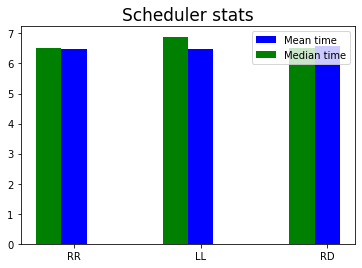

In [148]:
X = np.arange(len(avg_times))
ax = plt.subplot(111)
ax.bar(X, avg_times.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, median_times.values(), width=0.2, color='g', align='center')
ax.legend(('Mean time','Median time'))
plt.xticks(X, avg_times.keys())
plt.title("Scheduler stats", fontsize=17)
plt.show()